# Part II - (Airline Passenger Satisfaction)
## by (Valentine Ezenwanne)


## Investigation Overview

In this investigation, I wanted to look at the features of the airline that influences the overall satisfaction and dissatisfaction of the passengers. I will focus on the numerical variable flight distance, and for catergorical variables, Departure and Arrival Time Convenience, In-flight Service, In-flight Wifi Service and In-flight Entertainment, Food and Drinks, Seat Comfort and Leg Room Service. 


## Dataset Overview

The data contains survey on Customer satisfaction scores for approximately 120,000+ airline passengers. There are 24 features of which the aforementioned features are included. Three hundred and ninety three (393) data points were removed due to missing values and fourteen(14) features had its datatype changed to categorical.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('airline_passenger_satisfaction.csv')

In [4]:
# Creating a copy of the dataset for cleaning
df = data.copy()

#Data Wrangling, Dropping the missing values
df.dropna(inplace=True)

In [5]:
#Data Wrangling, Converting to categorical datatype
df = df.astype({
    'Departure and Arrival Time Convenience': 'category',
    'Ease of Online Booking': 'category',
    'Check-in Service': 'category',
    'Online Boarding': 'category', 
    'Gate Location': 'category', 
    'On-board Service': 'category', 
    'Seat Comfort': 'category', 
    'Leg Room Service': 'category', 
    'Cleanliness': 'category', 
    'Food and Drink': 'category', 
    'In-flight Service': 'category', 
    'In-flight Wifi Service': 'category', 
    'In-flight Entertainment': 'category', 
    'Baggage Handling': 'category'
})

### Distribution of Flight Distance

Flight Distance is a numerical variable which entail the distance travelled by each airline in miles. The distribution when plotted on a log scaled transformation shows that the distribution of the Flight Distance is bimodal, with the first mode below a distance of 1000 miles and the second mode above 1000 miles.

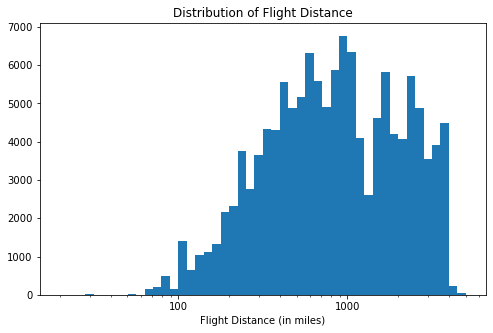

In [6]:
# Plotting it on a log transformed scale

bins = 10**np.arange(1.3, 3.7+0.05, 0.05)   #creating bin edges based on log10 of the descriptive statistics 

plt.figure(figsize=[8, 5])
plt.hist(data = df, x='Flight Distance', bins = bins)
plt.xscale('log')
plt.xticks([1e2, 1e3], [100, 1000])
plt.xlabel('Flight Distance (in miles)')
plt.title('Distribution of Flight Distance')
plt.show()

### Distribution of the categorical features (In-flight Service, In-flight Wifi Service, In-flight Entertainment, Food and Drink, Seat Comfort, Leg Room Service, Cleanliness)


The Inflight features which includes **In-flight Service, In-flight Entertainment, Departure and Arrival Time of Convenience, Seat Comfort, Leg Room Service, and Food and Drink** had high number of high ratings at score 4-5 with score 4 being the most rated. 

The **In-flight Wifi Service** had a high number of ratings at low score ratings of 3 and 2 and low number of ratings at score 5.

These high ratings may constitute a **Satisfaction ratings** or **Dissatisfaction ratings**.


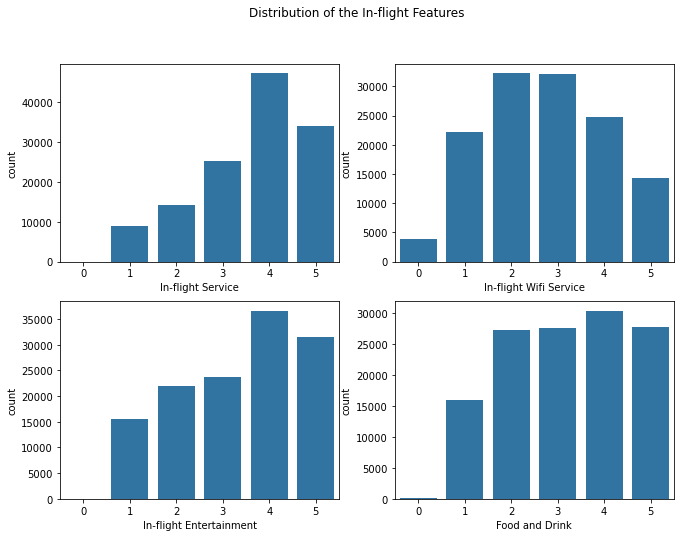

In [25]:
""" Plotting a standard countplot of the features(In-flight Service, In-flight Wifi Service, In-flight Entertainment, 
Food and Drink) together """

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[11,8])
default_color = sns.color_palette()[0]

sns.countplot(data= df, x='In-flight Service', color=default_color, ax=axes[0, 0])
sns.countplot(data= df, x='In-flight Wifi Service', color=default_color, ax=axes[0, 1])
sns.countplot(data= df, x='In-flight Entertainment', color=default_color, ax=axes[1, 0])
sns.countplot(data= df, x='Food and Drink', color=default_color, ax=axes[1, 1])
fig.suptitle('Distribution of the In-flight Features')
plt.show()

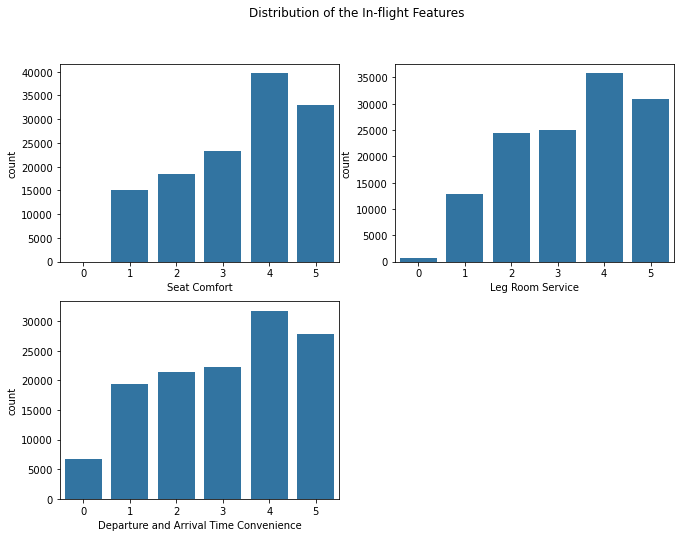

In [26]:
""" Plotting a standard countplot of the features(Seat Comfort, Leg Room Service, Departure and Arrival Time convenience) 
together """

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[11,8])
default_color = sns.color_palette()[0]

sns.countplot(data= df, x='Seat Comfort', color=default_color, ax=axes[0, 0])
sns.countplot(data= df, x='Leg Room Service', color=default_color, ax=axes[0, 1])
sns.countplot(data= df, x='Departure and Arrival Time Convenience', color=default_color, ax=axes[1, 0])
fig.delaxes(axes[1][1])     #this code remove the empty subplot on the axes
fig.suptitle('Distribution of the In-flight Features')
plt.show()

### Flight Distance vs. In-flight features

As the average flight distance increases the number of ratings also increases progressively from ratings 1-5 with features such as In-flight Service, In-flight Entertainment, Seat Comfort, Leg Room Service. This is to say that the farther the flight distance the higher the ratings for these features, which could be a satisfaction or dissatisfacting rating.

The In-flight Wifi Service showed a high rating of 5 for the average flight distance, but this high rating may be a satisfaction or dissatisfaction.

Food and Drink ratings are relatively the same for the average flight distance travelled. 

The departure and arrival time convenience show a decrease in ratings from 1-5 as average flight distance decreases. This implies the farther the distance the lower the ratings for this feature. 


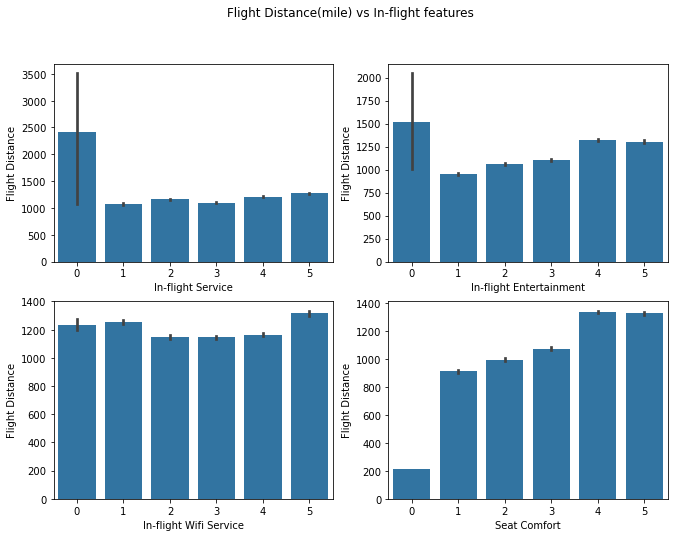

In [27]:
# plotting a barplot of Flight Distance and some ordinal variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[11,8])
default_color = sns.color_palette()[0]

sns.barplot(data=df, x='In-flight Service', y='Flight Distance', color=default_color, ax=axes[0, 0])
sns.barplot(data=df, x='In-flight Entertainment', y='Flight Distance', color=default_color, ax=axes[0,1])
sns.barplot(data=df, x='In-flight Wifi Service', y='Flight Distance', color=default_color, ax=axes[1, 0])
sns.barplot(data=df, x='Seat Comfort', y='Flight Distance', color=default_color, ax=axes[1, 1])
fig.suptitle('Flight Distance(mile) vs In-flight features')
plt.show()

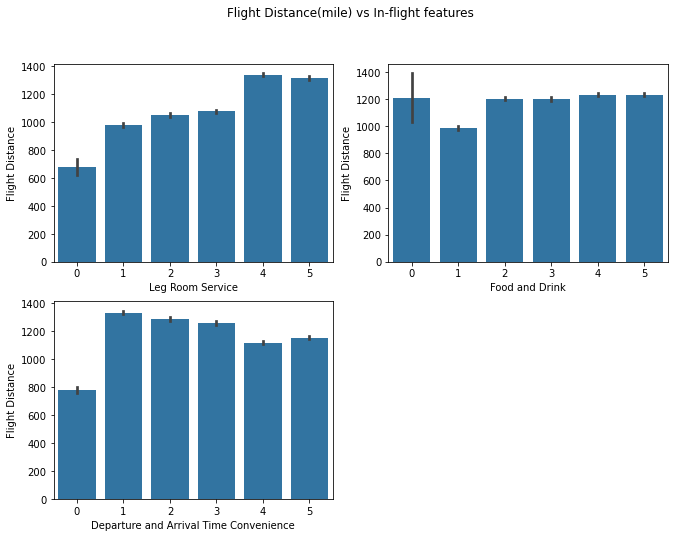

In [28]:
# plotting a barplot of Flight Distance and some ordinal variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[11,8])
default_color = sns.color_palette()[0]

sns.barplot(data=df, x='Leg Room Service', y='Flight Distance', color=default_color, ax=axes[0, 0])
sns.barplot(data=df, x='Food and Drink', y='Flight Distance', color=default_color, ax=axes[0, 1])
sns.barplot(data=df, x='Departure and Arrival Time Convenience', y='Flight Distance', color=default_color, ax=axes[1, 0])
fig.delaxes(axes[1][1])     #this code remove the empty subplot on the axes
fig.suptitle('Flight Distance(mile) vs In-flight features')
plt.show()

### Flight Distance and In-flight features by Satisfaction

A pattern is observed in the interaction, as the mean distance travelled increases, the satisfaction ratings increases progressively from 1-5 for the following features; In-flight Service, In-flight Entertainment, Seat Comfort and Leg Room Service. This is to say that the farther the average distance travelled the higher the number of satisfied passengers towards these features.

The In-flight Wifi Service and Departure and Arrival Time Convenience had the lowest satisfaction for the longest mean distance travelled. This means that more passenger rated low satisfaction for these two features as these customers may be experiencing irregular wifi connection due to weather and may also experience delay in departure and arrival time due to weather when ever they travel.

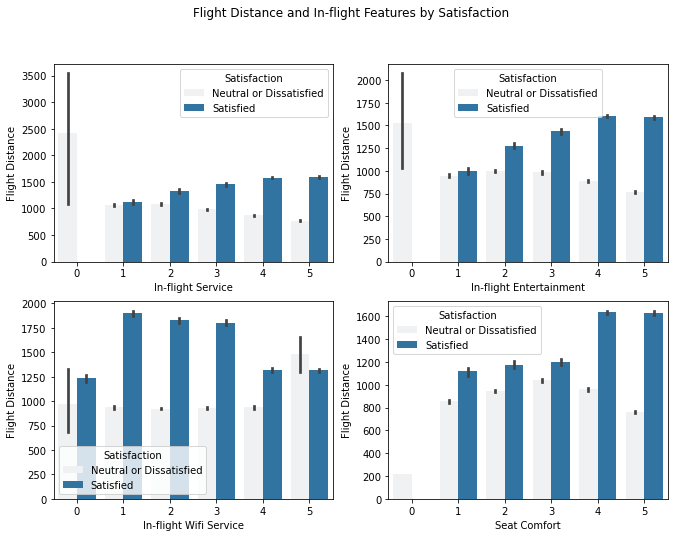

In [29]:
# plotting a barplot of Flight Distance and some ordinal variables by their satisfaction
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[11,8])
default_color = sns.color_palette()[0]

sns.barplot(data=df, x='In-flight Service', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[0, 0])
sns.barplot(data=df, x='In-flight Entertainment', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[0,1])
sns.barplot(data=df, x='In-flight Wifi Service', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[1, 0])
sns.barplot(data=df, x='Seat Comfort', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[1, 1])
fig.suptitle('Flight Distance and In-flight Features by Satisfaction')
plt.show()

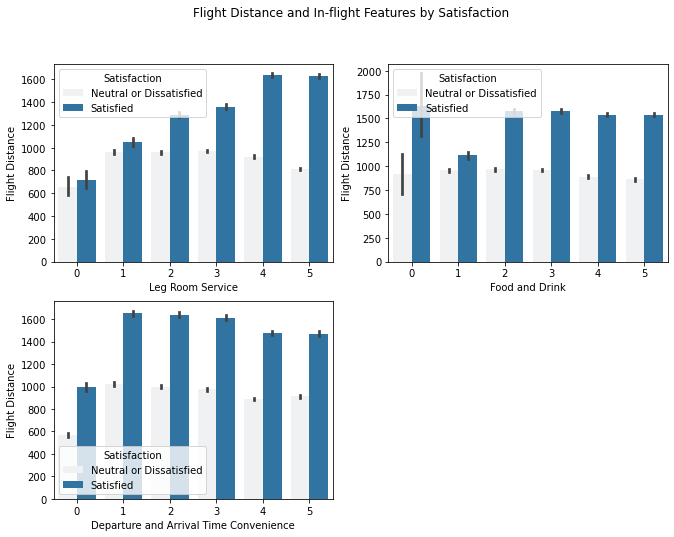

In [30]:
# plotting a barplot of Flight Distance and some ordinal variables by their satisfaction
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[11,8])
default_color = sns.color_palette()[0]

sns.barplot(data=df, x='Leg Room Service', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[0, 0])
sns.barplot(data=df, x='Food and Drink', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[0, 1])
sns.barplot(data=df, x='Departure and Arrival Time Convenience', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[1, 0])
fig.delaxes(axes[1][1])     #this code remove the empty subplot on the axes
fig.suptitle('Flight Distance and In-flight Features by Satisfaction')
plt.show()

## In-flight Features vs. Satisfaction

The In-flight features that had high number of satisfaction at high ratings of 4 and 5 include: **In-flight Entertainment, Seat Comfort, Leg Room Service and Food and Drinks**. Though these features had high number of satisfactions at high rating of 4 and 5, the number of dissatisfaction at low ratings of 3, 2 and 1 is greater than that of its satisfaction at the score rate. This means that while some passengers are satisfied with these features other are also dissatisfied and this may be based on the type of classes ply by these passengers. 

The **Departure and Arrival Time Convenience** had high number of dissatisfaction at all score rating, with the highest at score 4. This feature may have contributed greatly to the dissatisfaction of the passengers.

**In-flight Service, In-flight Wifi Service, Food and Drinks** had high number of dissatisfaction but at low rating. Though the number of satisfaction at score 4 and 5 are higher than its dissatisfaction at the same score rating, generally these features may also have contributed to the dissatisfaction of the passengers.


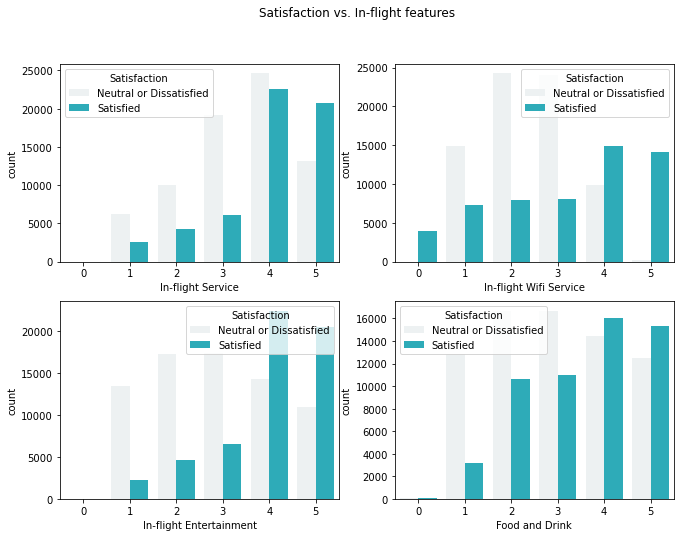

In [31]:
# plotting a clustered bar charts of Satisfaction and some ordinal variables

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[11,8])
default_color = sns.color_palette()[9]

sns.countplot(data=df, x='In-flight Service', hue='Satisfaction', color=default_color, ax=axes[0,0])
sns.countplot(data=df, x='In-flight Wifi Service', hue='Satisfaction', color=default_color, ax=axes[0, 1])
sns.countplot(data=df, x='In-flight Entertainment', hue='Satisfaction', color=default_color, ax=axes[1, 0])
sns.countplot(data=df, x='Food and Drink', hue='Satisfaction', color=default_color, ax=axes[1, 1])
fig.suptitle('Satisfaction vs. In-flight features')
plt.show()

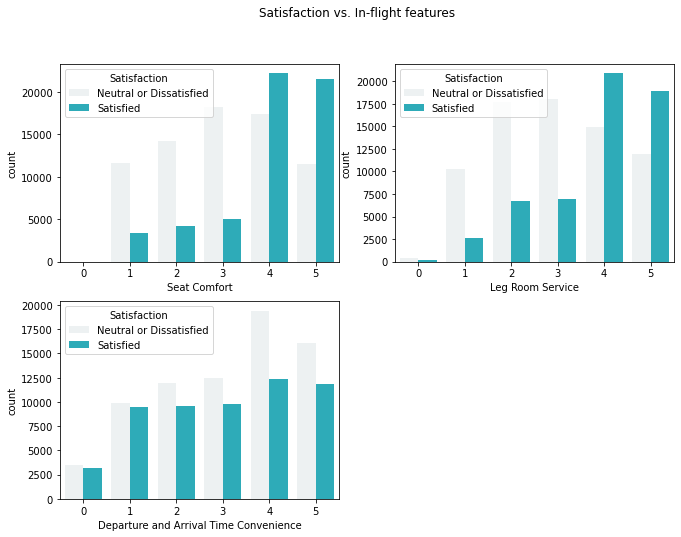

In [32]:
# plotting a clustered bar charts of Satisfaction and some ordinal variables

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[11,8])
default_color = sns.color_palette()[9]

sns.countplot(data=df, x='Seat Comfort', hue='Satisfaction', color=default_color, ax=axes[0, 0])
sns.countplot(data=df, x='Leg Room Service', hue='Satisfaction', color=default_color, ax=axes[0, 1])
sns.countplot(data=df, x='Departure and Arrival Time Convenience', hue='Satisfaction', color=default_color, ax=axes[1, 0])
fig.delaxes(axes[1][1])     #this code remove the empty subplot on the axes
fig.suptitle('Satisfaction vs. In-flight features')
plt.show()

### Satisfaction and In-flight features by Class

When i extended my investigation of satisfaction with each of the main features of interest to the classes that the passengers belongs to, it showed that passengers who travel using the business class rated the features of interest highly at score 4 and 5 and were mostly satisfied. 

Dissatisfaction of these features of interest occured majorly in the Economy class where the passengers do not enjoy the perks that business class do enjoy such as seat comfort, extra leg room service and other perks.

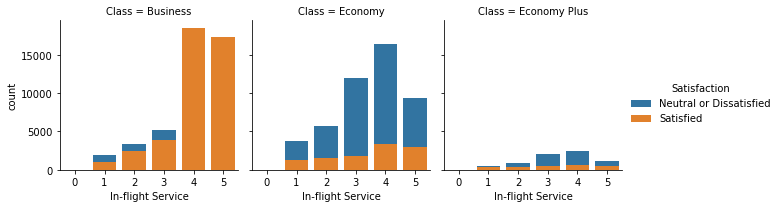

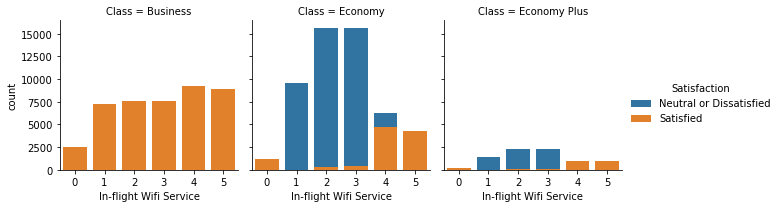

In [34]:
# defining a function for plotting a FacetGrid of the countplot of classes for each features and their satisfaction
def plotFacetGrid(x):
    g = sns.FacetGrid(data=df, col='Class', hue='Satisfaction')   
    return (g.map(sns.countplot, x).add_legend())

#Creating a list of categorical variable for the plot
cat_variables = ['In-flight Service', 'In-flight Wifi Service']

#Creating a loop to loop through the creates and call the function for plotting the Countplot
for x in cat_variables:
    plotFacetGrid(x)

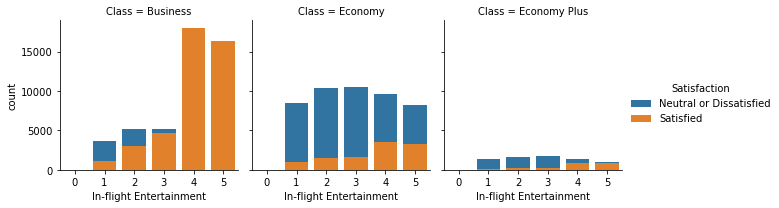

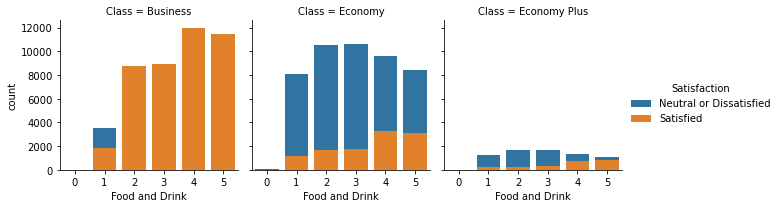

In [35]:
# plotting a FacetGrid of the countplot of classes for each features and their satisfaction

#Creating a list of categorical variable for the plot
cat_variables = [ 'In-flight Entertainment', 'Food and Drink']

#Creating a loop to loop through the creates and call the function for plotting the Countplot
for x in cat_variables:
    plotFacetGrid(x)

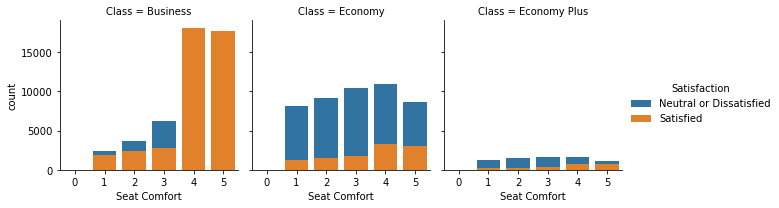

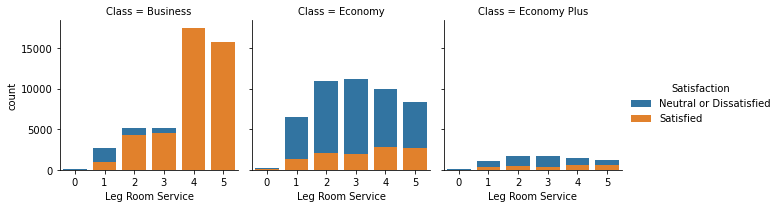

In [36]:
# plotting a FacetGrid of the countplot of classes for each features and their satisfaction

#Creating a list of categorical variable for the plot
cat_variables = ['Seat Comfort', 'Leg Room Service']

#Creating a loop to loop through the creates and call the function for plotting the Countplot
for x in cat_variables:
    plotFacetGrid(x)

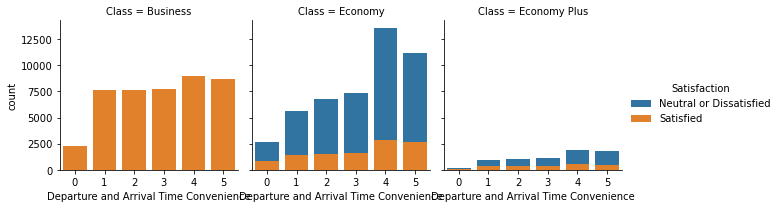

In [37]:
# plotting a FacetGrid of the countplot of classes for each features and their satisfaction

#Creating a list of categorical variable for the plot
cat_variables = [ 'Departure and Arrival Time Convenience']

#Creating a loop to loop through the creates and call the function for plotting the Countplot
for x in cat_variables:
    plotFacetGrid(x)

In [38]:
!jupyter nbconvert Part_II_slide_deck_exploration_of_airline_passenger_satisfaction.ipynb --to slides --post serve --no-input --no-prompt

^C
